<a href="https://colab.research.google.com/github/iopebiel/machine_learning_fraud_credit_card/blob/randomForest/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Bibliotecas

In [1]:
!pip install imblearn
from sklearn.metrics import roc_auc_score
from kagglehub import KaggleDatasetAdapter
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.combine import SMOTEENN
from cuml.ensemble import RandomForestClassifier as cuRandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, matthews_corrcoef
import pandas as pd
import seaborn as sn
import kagglehub as kh
import matplotlib.pyplot as plt
import os

/usr/local/lib/python3.11/dist-packages/cudf/utils/gpu_utils.py:75: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))


Download Arquivo CSV no repositório Credit Card Fraud na plataforma Kaggle

In [2]:
path = kh.dataset_download("mlg-ulb/creditcardfraud")

print("Caminho para o Dataset:", path)
os.listdir(path)

Caminho para o Dataset: /kaggle/input/creditcardfraud


['creditcard.csv']

In [3]:
data = pd.read_csv("../kaggle/input/creditcardfraud/creditcard.csv")
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


## Pré processamento dos dados

In [4]:
number_of_fraud = len(data[data.Class == 1])
number_of_normal= len(data[data.Class == 0])

print ("Fraude:", number_of_fraud)
print ("Legítima:",number_of_normal)

Fraude: 492
Legítima: 284315


In [5]:
X = data.drop("Class", axis=1)
y = data["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
counter = Counter(y_train)
print('Base de dados de treino antes do SMOTE-ENN:', counter)
counter = Counter(y_test)
print('Base de dados de teste', counter)

Base de dados de treino antes do SMOTE-ENN: Counter({0: 199020, 1: 344})
Base de dados de teste Counter({0: 85295, 1: 148})


##SMOTE 50:50

In [6]:
smt = SMOTEENN(random_state=42)
X_train_sm_5050, y_train_sm_5050 = smt.fit_resample(X_train, y_train)
counter = Counter(y_train_sm_5050)
print('Depois do SMOTE-ENN:', counter)

Depois do SMOTE-ENN: Counter({1: 190538, 0: 182347})


##SMOTE 10 : 90

In [7]:
smt = SMOTEENN(random_state=42, sampling_strategy=0.111)
X_train_sm_1090, y_train_sm_1090 = smt.fit_resample(X_train, y_train)
counter = Counter(y_train_sm_1090)
print('Depois do SMOTE-ENN:', counter)

Depois do SMOTE-ENN: Counter({0: 191146, 1: 14770})


#MODELO TREINAMENTO SEM SMOTE

#####**MODELO 1 SCIKIT LEARN PURO**

In [15]:
model = RandomForestClassifier(n_estimators=1000 ,class_weight='balanced', verbose=5, n_jobs=100) #Quanto maior o número de iterações, melhor o resultado

model.fit(X_train,y_train)
y_pred_rl = model.predict(X_train)

print(classification_report(y_train, y_pred_rl))

[Parallel(n_jobs=100)]: Using backend ThreadingBackend with 100 concurrent workers.


building tree 1 of 1000building tree 2 of 1000

building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building 

[Parallel(n_jobs=100)]: Done  88 tasks      | elapsed:  2.3min


building tree 189 of 1000
building tree 190 of 1000
building tree 191 of 1000
building tree 192 of 1000
building tree 193 of 1000
building tree 194 of 1000
building tree 195 of 1000
building tree 196 of 1000
building tree 197 of 1000
building tree 198 of 1000
building tree 199 of 1000
building tree 200 of 1000
building tree 201 of 1000
building tree 202 of 1000
building tree 203 of 1000
building tree 204 of 1000
building tree 205 of 1000
building tree 206 of 1000
building tree 207 of 1000
building tree 208 of 1000
building tree 209 of 1000
building tree 210 of 1000
building tree 211 of 1000
building tree 212 of 1000
building tree 213 of 1000
building tree 214 of 1000
building tree 215 of 1000
building tree 216 of 1000
building tree 217 of 1000
building tree 218 of 1000
building tree 219 of 1000
building tree 220 of 1000
building tree 221 of 1000
building tree 222 of 1000
building tree 223 of 1000
building tree 224 of 1000
building tree 225 of 1000
building tree 226 of 1000
building tre

[Parallel(n_jobs=100)]: Done 250 tasks      | elapsed:  5.7min


building tree 351 of 1000
building tree 352 of 1000
building tree 353 of 1000
building tree 354 of 1000
building tree 355 of 1000
building tree 356 of 1000
building tree 357 of 1000
building tree 358 of 1000
building tree 359 of 1000
building tree 360 of 1000
building tree 361 of 1000
building tree 362 of 1000
building tree 363 of 1000
building tree 364 of 1000
building tree 365 of 1000
building tree 366 of 1000
building tree 367 of 1000
building tree 368 of 1000
building tree 369 of 1000
building tree 370 of 1000
building tree 371 of 1000
building tree 372 of 1000
building tree 373 of 1000
building tree 374 of 1000
building tree 375 of 1000
building tree 376 of 1000
building tree 377 of 1000
building tree 378 of 1000
building tree 379 of 1000
building tree 380 of 1000
building tree 381 of 1000
building tree 382 of 1000
building tree 383 of 1000
building tree 384 of 1000
building tree 385 of 1000
building tree 386 of 1000
building tree 387 of 1000
building tree 388 of 1000
building tre

[Parallel(n_jobs=100)]: Done 448 tasks      | elapsed:  9.6min


building tree 549 of 1000
building tree 550 of 1000
building tree 551 of 1000
building tree 552 of 1000
building tree 553 of 1000
building tree 554 of 1000
building tree 555 of 1000
building tree 556 of 1000
building tree 557 of 1000
building tree 558 of 1000
building tree 559 of 1000
building tree 560 of 1000
building tree 561 of 1000
building tree 562 of 1000
building tree 563 of 1000
building tree 564 of 1000
building tree 565 of 1000
building tree 566 of 1000
building tree 567 of 1000
building tree 568 of 1000
building tree 569 of 1000
building tree 570 of 1000
building tree 571 of 1000
building tree 572 of 1000
building tree 573 of 1000
building tree 574 of 1000
building tree 575 of 1000
building tree 576 of 1000
building tree 577 of 1000
building tree 578 of 1000
building tree 579 of 1000
building tree 580 of 1000
building tree 581 of 1000
building tree 582 of 1000
building tree 583 of 1000
building tree 584 of 1000
building tree 585 of 1000
building tree 586 of 1000
building tre

[Parallel(n_jobs=100)]: Done 682 tasks      | elapsed: 14.3min



building tree 783 of 1000
building tree 784 of 1000
building tree 785 of 1000
building tree 786 of 1000
building tree 787 of 1000
building tree 788 of 1000
building tree 789 of 1000
building tree 790 of 1000
building tree 791 of 1000
building tree 792 of 1000
building tree 793 of 1000
building tree 794 of 1000
building tree 795 of 1000
building tree 796 of 1000
building tree 797 of 1000
building tree 798 of 1000
building tree 799 of 1000building tree 800 of 1000

building tree 801 of 1000
building tree 802 of 1000
building tree 803 of 1000
building tree 804 of 1000
building tree 805 of 1000
building tree 806 of 1000
building tree 807 of 1000
building tree 808 of 1000
building tree 809 of 1000
building tree 810 of 1000
building tree 811 of 1000
building tree 812 of 1000
building tree 813 of 1000
building tree 814 of 1000
building tree 815 of 1000
building tree 816 of 1000
building tree 817 of 1000
building tree 818 of 1000
building tree 819 of 1000
building tree 820 of 1000
building tr

[Parallel(n_jobs=100)]: Done 1000 out of 1000 | elapsed: 19.6min finished
[Parallel(n_jobs=100)]: Using backend ThreadingBackend with 100 concurrent workers.
[Parallel(n_jobs=100)]: Done  88 tasks      | elapsed:    1.3s
[Parallel(n_jobs=100)]: Done 250 tasks      | elapsed:    3.8s
[Parallel(n_jobs=100)]: Done 448 tasks      | elapsed:    6.5s
[Parallel(n_jobs=100)]: Done 682 tasks      | elapsed:    8.6s


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00       344

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364



[Parallel(n_jobs=100)]: Done 1000 out of 1000 | elapsed:   11.3s finished


In [16]:
print(X_test)
resultado_rl = model.predict(X_test)

            Time        V1        V2        V3        V4        V5        V6  \
186882  127294.0 -2.537331  1.890864 -0.840555 -1.102759 -2.105725  0.367811   
165754  117632.0 -0.250839  1.104108  0.206089  0.417324  1.204079 -0.350694   
235285  148330.0  0.568980 -2.520416 -1.114138  1.670652 -1.128945  0.398822   
101271   67778.0  1.328892  0.226908 -0.308968  0.381772  0.238490 -0.282946   
5832      6308.0  1.124863 -0.165691  1.337053  1.030033 -0.891116  0.202926   
...          ...       ...       ...       ...       ...       ...       ...   
64725    51279.0 -1.808185  1.328808 -0.991449 -2.473986  2.185095  3.496806   
16688    28048.0 -0.442905  0.716727  1.256775  0.860048  1.210872  1.066390   
183868  125990.0  2.092418 -0.931315 -1.553089 -1.131369 -0.197801 -0.373117   
45011    42168.0  1.293234  0.097565 -0.209304  0.329036  0.034958 -0.145507   
150527   93609.0  2.214016 -0.584030 -1.238673 -0.702993 -0.184492 -0.646248   

              V7        V8        V9  .

[Parallel(n_jobs=100)]: Using backend ThreadingBackend with 100 concurrent workers.
[Parallel(n_jobs=100)]: Done  88 tasks      | elapsed:    0.9s
[Parallel(n_jobs=100)]: Done 250 tasks      | elapsed:    1.5s
[Parallel(n_jobs=100)]: Done 448 tasks      | elapsed:    2.5s
[Parallel(n_jobs=100)]: Done 682 tasks      | elapsed:    4.2s
[Parallel(n_jobs=100)]: Done 1000 out of 1000 | elapsed:    5.3s finished



MÉTRICAS TREINAMENTO
 
SEM SMOTE



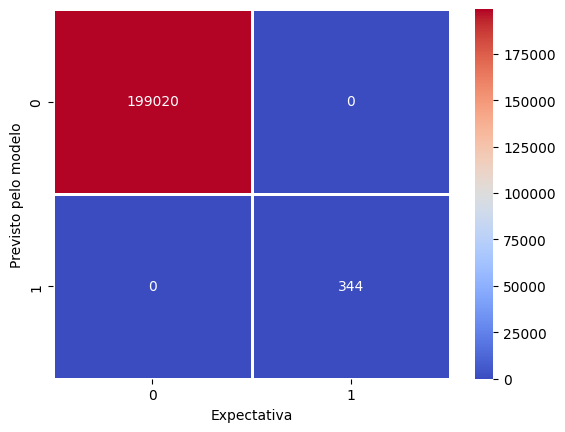

Acurácia: 100.000000%
Precisão: 100.000000%
Recall:  100.000000%
F1 Score:  100.000000%
MCC:  1.0

MÉTRICAS TESTE
 
SEM SMOTE



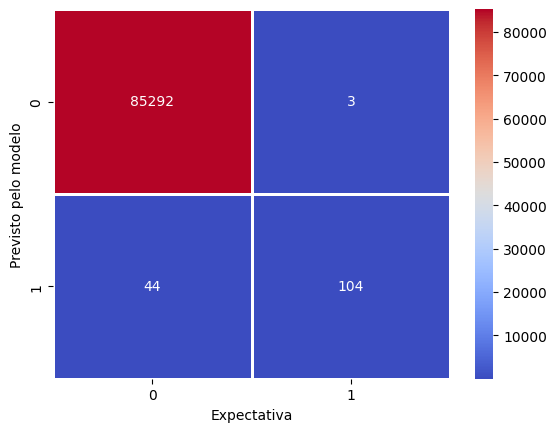

Acurácia: 99.944993%
Precisão: 97.196262%
Recall:  70.270270%
F1 Score:  81.568627%
MCC:  0.8261986868942863

MÉTRICA AUC ROC

Treinamento:  1.0 
Teste: 0.8513337653263792


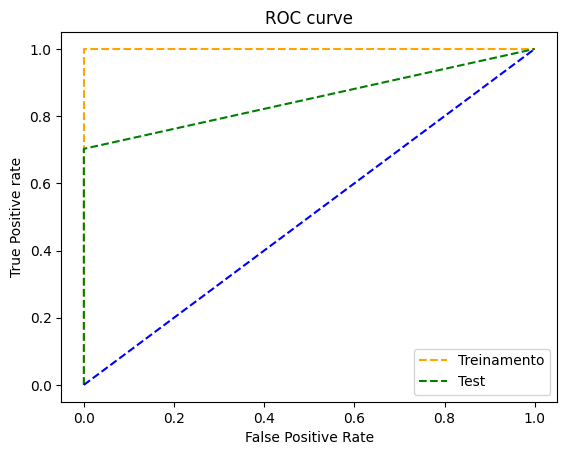

In [17]:
cf_matrix = confusion_matrix(y_train, y_pred_rl)
sn.heatmap(cf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Expectativa')
plt.ylabel('Previsto pelo modelo')
print("\nMÉTRICAS TREINAMENTO\n \nSEM SMOTE\n")
plt.show()
print(f'Acurácia: {accuracy_score(y_train, y_pred_rl):%}')
print(f'Precisão: {precision_score(y_train, y_pred_rl):%}')
print(f'Recall:  {recall_score(y_train, y_pred_rl):%}')
print(f'F1 Score:  {f1_score(y_train, y_pred_rl):%}')
print(f'MCC:  {matthews_corrcoef(y_train, y_pred_rl)}')
cf_matrix = confusion_matrix(y_test, resultado_rl)
sn.heatmap(cf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Expectativa')
plt.ylabel('Previsto pelo modelo')
print("\nMÉTRICAS TESTE\n \nSEM SMOTE\n")
plt.show()
print(f'Acurácia: {accuracy_score(y_test, resultado_rl):%}')
print(f'Precisão: {precision_score(y_test, resultado_rl):%}')
print(f'Recall:  {recall_score(y_test, resultado_rl):%}')
print(f'F1 Score:  {f1_score(y_test, resultado_rl):%}')
print(f'MCC:  {matthews_corrcoef(y_test, resultado_rl)}')


print("\nMÉTRICA AUC ROC\n")
fpr1, tpr1, thresh1 = roc_curve(y_train, y_pred_rl, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, resultado_rl, pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

auc_score1 = roc_auc_score(y_train, y_pred_rl)
auc_score2 = roc_auc_score(y_test, resultado_rl)

print("Treinamento: ",auc_score1, "\nTeste:", auc_score2)

plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Treinamento')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Test')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC')
plt.show();

#####**MODELO 2 SCIKIT LEARN RAPIDS CUML**

In [ ]:
model = cuRandomForestClassifier(max_iter=10000, solver='qn',verbose=True)
model.fit(X_train, y_train)
y_pred_curl = model.predict(X_train)

print(classification_report(y_train, y_pred_curl))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      0.97      0.99       344

    accuracy                           1.00    199364
   macro avg       1.00      0.99      0.99    199364
weighted avg       1.00      1.00      1.00    199364



In [ ]:
print(X_test)
resultado_curl = model.predict(X_test)

            Time        V1        V2        V3        V4        V5        V6  \
186882  127294.0 -2.537331  1.890864 -0.840555 -1.102759 -2.105725  0.367811   
165754  117632.0 -0.250839  1.104108  0.206089  0.417324  1.204079 -0.350694   
235285  148330.0  0.568980 -2.520416 -1.114138  1.670652 -1.128945  0.398822   
101271   67778.0  1.328892  0.226908 -0.308968  0.381772  0.238490 -0.282946   
5832      6308.0  1.124863 -0.165691  1.337053  1.030033 -0.891116  0.202926   
...          ...       ...       ...       ...       ...       ...       ...   
64725    51279.0 -1.808185  1.328808 -0.991449 -2.473986  2.185095  3.496806   
16688    28048.0 -0.442905  0.716727  1.256775  0.860048  1.210872  1.066390   
183868  125990.0  2.092418 -0.931315 -1.553089 -1.131369 -0.197801 -0.373117   
45011    42168.0  1.293234  0.097565 -0.209304  0.329036  0.034958 -0.145507   
150527   93609.0  2.214016 -0.584030 -1.238673 -0.702993 -0.184492 -0.646248   

              V7        V8        V9  .


MÉTRICAS TREINAMENTO
 
SEM SMOTE



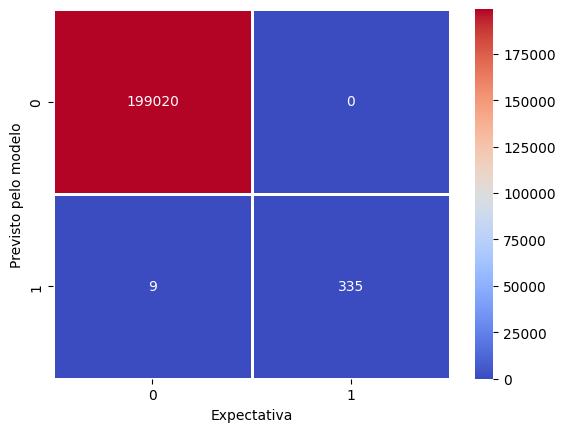

Acurácia: 99.995486%
Precisão: 100.000000%
Recall:  97.383721%
F1 Score:  98.674521%
MCC:  98.680959%

MÉTRICAS TESTE
 
SEM SMOTE



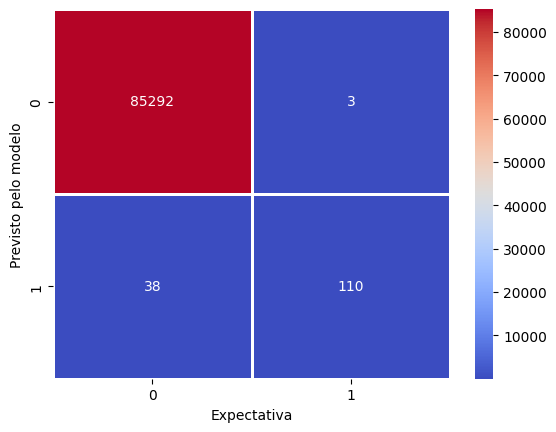

Acurácia: 99.952015%
Precisão: 97.345133%
Recall:  74.324324%
F1 Score:  84.291188%
MCC:  85.037986%

MÉTRICA AUC ROC

Treinamento:  0.9869186046511628 
Teste: 0.8716040355966495


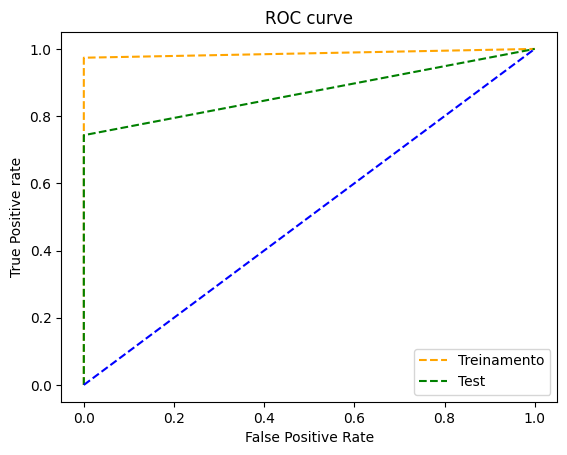

In [ ]:
cf_matrix = confusion_matrix(y_train, y_pred_curl)
sn.heatmap(cf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Expectativa')
plt.ylabel('Previsto pelo modelo')
print("\nMÉTRICAS TREINAMENTO\n \nSEM SMOTE\n")
plt.show()
print(f'Acurácia: {accuracy_score(y_train, y_pred_curl):%}')
print(f'Precisão: {precision_score(y_train, y_pred_curl):%}')
print(f'Recall:  {recall_score(y_train, y_pred_curl):%}')
print(f'F1 Score:  {f1_score(y_train, y_pred_curl):%}')
print(f'MCC:  {matthews_corrcoef(y_train, y_pred_curl)}')
cf_matrix = confusion_matrix(y_test, resultado_curl)
sn.heatmap(cf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Expectativa')
plt.ylabel('Previsto pelo modelo')
print("\nMÉTRICAS TESTE\n \nSEM SMOTE\n")
plt.show()
print(f'Acurácia: {accuracy_score(y_test, resultado_curl):%}')
print(f'Precisão: {precision_score(y_test, resultado_curl):%}')
print(f'Recall:  {recall_score(y_test, resultado_curl):%}')
print(f'F1 Score:  {f1_score(y_test, resultado_curl):%}')
print(f'MCC:  {matthews_corrcoef(y_test, resultado_curl)}')


print("\nMÉTRICA AUC ROC\n")
fpr1, tpr1, thresh1 = roc_curve(y_train, y_pred_curl, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, resultado_curl, pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

auc_score1 = roc_auc_score(y_train, y_pred_curl)
auc_score2 = roc_auc_score(y_test, resultado_curl)

print("Treinamento: ",auc_score1, "\nTeste:", auc_score2)

plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Treinamento')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Test')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC')
plt.show();

#MODELO TREINAMENTO 10 : 90

#####**MODELO 1**

In [ ]:
model = RandomForestClassifier(n_estimators=1000, class_weight={0: 1, 1: 10}, verbose=5, n_jobs=100) #Quanto maior o número de iterações, melhor o resultado
model.fit(X_train_sm_1090, y_train_sm_1090)
y_pred_rl = model.predict(X_train_sm_1090)

print(classification_report(y_train_sm_1090, y_pred_rl))

[Parallel(n_jobs=100)]: Using backend ThreadingBackend with 100 concurrent workers.
[Parallel(n_jobs=100)]: Done 250 tasks      | elapsed:  7.5min
[Parallel(n_jobs=100)]: Done 600 tasks      | elapsed: 16.2min
[Parallel(n_jobs=100)]: Done 1000 out of 1000 | elapsed: 25.0min finished
[Parallel(n_jobs=100)]: Using backend ThreadingBackend with 100 concurrent workers.
[Parallel(n_jobs=100)]: Done 250 tasks      | elapsed:    3.3s
[Parallel(n_jobs=100)]: Done 600 tasks      | elapsed:    8.0s


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198698
           1       1.00      1.00      1.00     22055

    accuracy                           1.00    220753
   macro avg       1.00      1.00      1.00    220753
weighted avg       1.00      1.00      1.00    220753



[Parallel(n_jobs=100)]: Done 1000 out of 1000 | elapsed:   11.7s finished


In [ ]:
print(X_test)
resultado_rl = model.predict(X_test)

[Parallel(n_jobs=100)]: Using backend ThreadingBackend with 100 concurrent workers.


            Time        V1        V2        V3        V4        V5        V6  \
186882  127294.0 -2.537331  1.890864 -0.840555 -1.102759 -2.105725  0.367811   
165754  117632.0 -0.250839  1.104108  0.206089  0.417324  1.204079 -0.350694   
235285  148330.0  0.568980 -2.520416 -1.114138  1.670652 -1.128945  0.398822   
101271   67778.0  1.328892  0.226908 -0.308968  0.381772  0.238490 -0.282946   
5832      6308.0  1.124863 -0.165691  1.337053  1.030033 -0.891116  0.202926   
...          ...       ...       ...       ...       ...       ...       ...   
64725    51279.0 -1.808185  1.328808 -0.991449 -2.473986  2.185095  3.496806   
16688    28048.0 -0.442905  0.716727  1.256775  0.860048  1.210872  1.066390   
183868  125990.0  2.092418 -0.931315 -1.553089 -1.131369 -0.197801 -0.373117   
45011    42168.0  1.293234  0.097565 -0.209304  0.329036  0.034958 -0.145507   
150527   93609.0  2.214016 -0.584030 -1.238673 -0.702993 -0.184492 -0.646248   

              V7        V8        V9  .

[Parallel(n_jobs=100)]: Done 250 tasks      | elapsed:    1.4s
[Parallel(n_jobs=100)]: Done 600 tasks      | elapsed:    2.7s
[Parallel(n_jobs=100)]: Done 1000 out of 1000 | elapsed:    4.4s finished



MÉTRICAS TREINAMENTO
 
SMOTE 1090



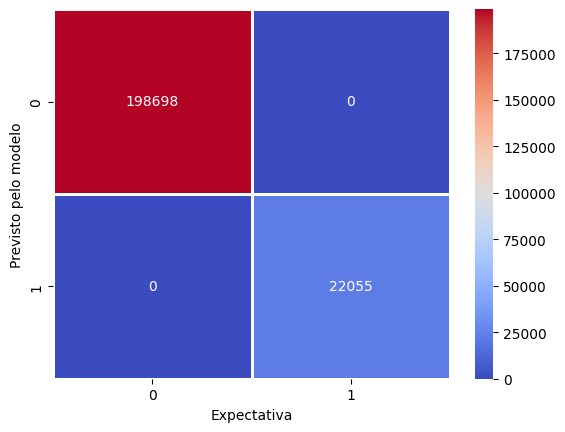

Acurácia: 100.000000%
Precisão: 100.000000%
Recall:  100.000000%
F1 Score:  100.000000%
MCC:  100.000000%

MÉTRICAS TESTE
 
SMOTE 1090



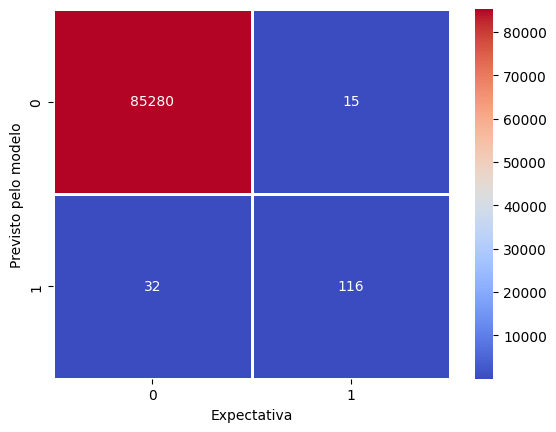

Acurácia: 99.944993%
Precisão: 88.549618%
Recall:  78.378378%
F1 Score:  83.154122%
MCC:  83.281925%

MÉTRICA AUC ROC

Treinamento:  1.0 
Teste: 0.8918039617670311


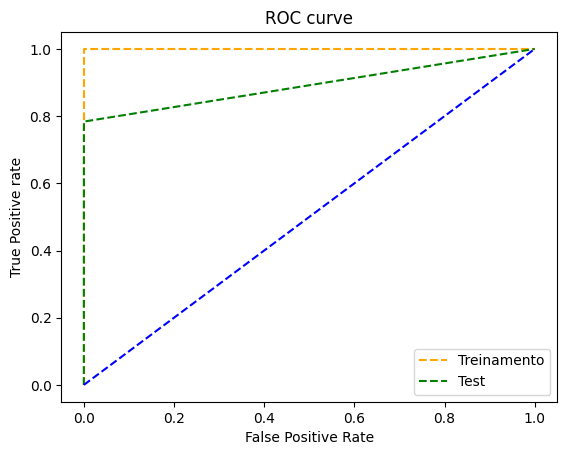

In [ ]:
cf_matrix = confusion_matrix(y_train_sm_1090, y_pred_rl)
sn.heatmap(cf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Expectativa')
plt.ylabel('Previsto pelo modelo')
print("\nMÉTRICAS TREINAMENTO\n \nSMOTE 1090\n")
plt.show()
print(f'Acurácia: {accuracy_score(y_train_sm_1090, y_pred_rl):%}')
print(f'Precisão: {precision_score(y_train_sm_1090, y_pred_rl):%}')
print(f'Recall:  {recall_score(y_train_sm_1090, y_pred_rl):%}')
print(f'F1 Score:  {f1_score(y_train_sm_1090, y_pred_rl):%}')
print(f'MCC:  {matthews_corrcoef(y_train_sm_1090, y_pred_rl)}')
cf_matrix = confusion_matrix(y_test, resultado_rl)
sn.heatmap(cf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Expectativa')
plt.ylabel('Previsto pelo modelo')
print("\nMÉTRICAS TESTE\n \nSMOTE 1090\n")
plt.show()
print(f'Acurácia: {accuracy_score(y_test, resultado_rl):%}')
print(f'Precisão: {precision_score(y_test, resultado_rl):%}')
print(f'Recall:  {recall_score(y_test, resultado_rl):%}')
print(f'F1 Score:  {f1_score(y_test, resultado_rl):%}')
print(f'MCC:  {matthews_corrcoef(y_test, resultado_rl)}')


print("\nMÉTRICA AUC ROC\n")
fpr1, tpr1, thresh1 = roc_curve(y_train_sm_1090, y_pred_rl, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, resultado_rl, pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

auc_score1 = roc_auc_score(y_train_sm_1090, y_pred_rl)
auc_score2 = roc_auc_score(y_test, resultado_rl)

print("Treinamento: ",auc_score1, "\nTeste:", auc_score2)

plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Treinamento')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Test')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC')
plt.show();

#####**MODELO 2**

In [ ]:
model = cuRandomForestClassifier(max_iter=10000, solver='qn', verbose=True)  # qn é equivalente ao saga
model.fit(X_train_sm_1090, y_train_sm_1090)
y_pred_curl = model.predict(X_train_sm_1090)

print(classification_report(y_train_sm_1090, y_pred_curl))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198698
           1       1.00      1.00      1.00     22055

    accuracy                           1.00    220753
   macro avg       1.00      1.00      1.00    220753
weighted avg       1.00      1.00      1.00    220753



In [ ]:
print(X_test)
resultado_curl = model.predict(X_test)

            Time        V1        V2        V3        V4        V5        V6  \
186882  127294.0 -2.537331  1.890864 -0.840555 -1.102759 -2.105725  0.367811   
165754  117632.0 -0.250839  1.104108  0.206089  0.417324  1.204079 -0.350694   
235285  148330.0  0.568980 -2.520416 -1.114138  1.670652 -1.128945  0.398822   
101271   67778.0  1.328892  0.226908 -0.308968  0.381772  0.238490 -0.282946   
5832      6308.0  1.124863 -0.165691  1.337053  1.030033 -0.891116  0.202926   
...          ...       ...       ...       ...       ...       ...       ...   
64725    51279.0 -1.808185  1.328808 -0.991449 -2.473986  2.185095  3.496806   
16688    28048.0 -0.442905  0.716727  1.256775  0.860048  1.210872  1.066390   
183868  125990.0  2.092418 -0.931315 -1.553089 -1.131369 -0.197801 -0.373117   
45011    42168.0  1.293234  0.097565 -0.209304  0.329036  0.034958 -0.145507   
150527   93609.0  2.214016 -0.584030 -1.238673 -0.702993 -0.184492 -0.646248   

              V7        V8        V9  .


MÉTRICAS TREINAMENTO
 
SMOTE 1090



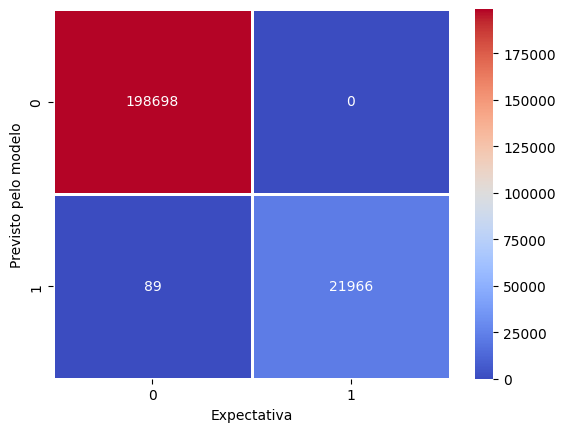

Acurácia: 99.959683%
Precisão: 100.000000%
Recall:  99.596463%
F1 Score:  99.797824%
MCC:  99.775685%

MÉTRICAS TESTE
 
SMOTE 1090



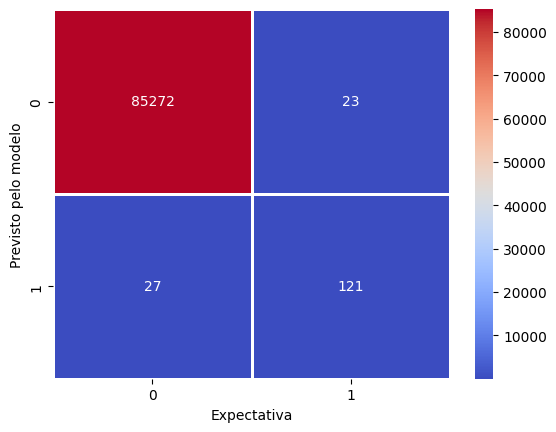

Acurácia: 99.941481%
Precisão: 84.027778%
Recall:  81.756757%
F1 Score:  82.876712%
MCC:  82.855209%

MÉTRICA AUC ROC

Treinamento:  0.9979823169349353 
Teste: 0.9086489575923306


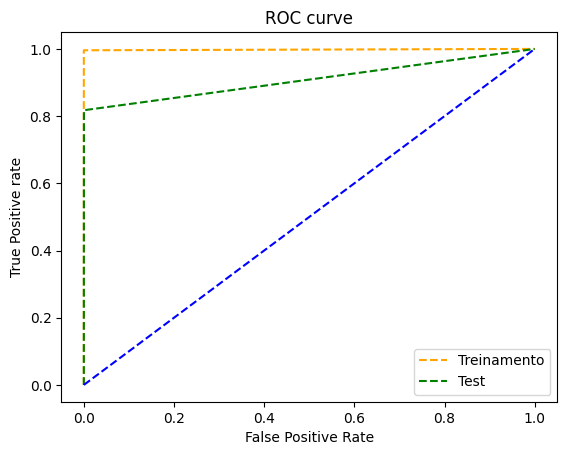

In [ ]:
cf_matrix = confusion_matrix(y_train_sm_1090, y_pred_curl)
sn.heatmap(cf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Expectativa')
plt.ylabel('Previsto pelo modelo')
print("\nMÉTRICAS TREINAMENTO\n \nSMOTE 1090\n")
plt.show()
print(f'Acurácia: {accuracy_score(y_train_sm_1090, y_pred_curl):%}')
print(f'Precisão: {precision_score(y_train_sm_1090, y_pred_curl):%}')
print(f'Recall:  {recall_score(y_train_sm_1090, y_pred_curl):%}')
print(f'F1 Score:  {f1_score(y_train_sm_1090, y_pred_curl):%}')
print(f'MCC:  {matthews_corrcoef(y_train_sm_1090, y_pred_curl)}')
cf_matrix = confusion_matrix(y_test, resultado_curl)
sn.heatmap(cf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Expectativa')
plt.ylabel('Previsto pelo modelo')
print("\nMÉTRICAS TESTE\n \nSMOTE 1090\n")
plt.show()
print(f'Acurácia: {accuracy_score(y_test, resultado_curl):%}')
print(f'Precisão: {precision_score(y_test, resultado_curl):%}')
print(f'Recall:  {recall_score(y_test, resultado_curl):%}')
print(f'F1 Score:  {f1_score(y_test, resultado_curl):%}')
print(f'MCC:  {matthews_corrcoef(y_test, resultado_curl)}')


print("\nMÉTRICA AUC ROC\n")
fpr1, tpr1, thresh1 = roc_curve(y_train_sm_1090, y_pred_curl, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, resultado_curl, pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

auc_score1 = roc_auc_score(y_train_sm_1090, y_pred_curl)
auc_score2 = roc_auc_score(y_test, resultado_curl)

print("Treinamento: ",auc_score1, "\nTeste:", auc_score2)

plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Treinamento')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Test')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC')
plt.show();

#**MODELOS TREINAMENTO 50:50**

#####**MODELO 1**

In [11]:
model = RandomForestClassifier(n_estimators=6000, verbose=5, n_jobs=100) #Quanto maior o número de iterações, melhor o resultado
model.fit(X_train_sm_5050,y_train_sm_5050)
y_pred_rl = model.predict(X_train_sm_5050)

print(classification_report(y_train_sm_5050, y_pred_rl))

[Parallel(n_jobs=100)]: Using backend ThreadingBackend with 100 concurrent workers.


building tree 1 of 6000
building tree 2 of 6000
building tree 3 of 6000
building tree 4 of 6000
building tree 5 of 6000
building tree 6 of 6000
building tree 7 of 6000
building tree 8 of 6000
building tree 9 of 6000
building tree 10 of 6000
building tree 11 of 6000
building tree 12 of 6000
building tree 13 of 6000
building tree 14 of 6000
building tree 15 of 6000
building tree 16 of 6000
building tree 17 of 6000
building tree 18 of 6000
building tree 19 of 6000
building tree 20 of 6000
building tree 21 of 6000
building tree 22 of 6000
building tree 23 of 6000
building tree 24 of 6000
building tree 25 of 6000
building tree 26 of 6000
building tree 27 of 6000
building tree 28 of 6000
building tree 29 of 6000
building tree 30 of 6000
building tree 31 of 6000
building tree 32 of 6000
building tree 33 of 6000
building tree 34 of 6000
building tree 35 of 6000
building tree 36 of 6000
building tree 37 of 6000
building tree 38 of 6000
building tree 39 of 6000
building tree 40 of 6000
building 

[Parallel(n_jobs=100)]: Done  88 tasks      | elapsed:  6.9min


building tree 189 of 6000
building tree 190 of 6000
building tree 191 of 6000
building tree 192 of 6000
building tree 193 of 6000
building tree 194 of 6000
building tree 195 of 6000
building tree 196 of 6000
building tree 197 of 6000
building tree 198 of 6000
building tree 199 of 6000
building tree 200 of 6000
building tree 201 of 6000
building tree 202 of 6000
building tree 203 of 6000
building tree 204 of 6000
building tree 205 of 6000
building tree 206 of 6000
building tree 207 of 6000
building tree 208 of 6000
building tree 209 of 6000
building tree 210 of 6000
building tree 211 of 6000
building tree 212 of 6000
building tree 213 of 6000
building tree 214 of 6000
building tree 215 of 6000
building tree 216 of 6000
building tree 217 of 6000
building tree 218 of 6000
building tree 219 of 6000
building tree 220 of 6000
building tree 221 of 6000
building tree 222 of 6000
building tree 223 of 6000
building tree 224 of 6000
building tree 225 of 6000
building tree 226 of 6000
building tre

[Parallel(n_jobs=100)]: Done 250 tasks      | elapsed: 18.0min


building tree 351 of 6000
building tree 352 of 6000
building tree 353 of 6000
building tree 354 of 6000
building tree 355 of 6000
building tree 356 of 6000building tree 357 of 6000

building tree 358 of 6000
building tree 359 of 6000
building tree 360 of 6000
building tree 361 of 6000
building tree 362 of 6000
building tree 363 of 6000
building tree 364 of 6000
building tree 365 of 6000
building tree 366 of 6000
building tree 367 of 6000
building tree 368 of 6000
building tree 369 of 6000
building tree 370 of 6000
building tree 371 of 6000
building tree 372 of 6000
building tree 373 of 6000
building tree 374 of 6000
building tree 375 of 6000
building tree 376 of 6000
building tree 377 of 6000building tree 378 of 6000

building tree 379 of 6000
building tree 380 of 6000
building tree 381 of 6000
building tree 382 of 6000
building tree 383 of 6000
building tree 384 of 6000
building tree 385 of 6000
building tree 386 of 6000
building tree 387 of 6000
building tree 388 of 6000
building tre

[Parallel(n_jobs=100)]: Done 448 tasks      | elapsed: 30.0min


building tree 549 of 6000
building tree 550 of 6000
building tree 551 of 6000
building tree 552 of 6000
building tree 553 of 6000
building tree 554 of 6000
building tree 555 of 6000
building tree 556 of 6000
building tree 557 of 6000
building tree 558 of 6000
building tree 559 of 6000
building tree 560 of 6000
building tree 561 of 6000
building tree 562 of 6000
building tree 563 of 6000
building tree 564 of 6000
building tree 565 of 6000
building tree 566 of 6000
building tree 567 of 6000
building tree 568 of 6000
building tree 569 of 6000
building tree 570 of 6000
building tree 571 of 6000
building tree 572 of 6000
building tree 573 of 6000
building tree 574 of 6000
building tree 575 of 6000
building tree 576 of 6000
building tree 577 of 6000
building tree 578 of 6000
building tree 579 of 6000
building tree 580 of 6000
building tree 581 of 6000
building tree 582 of 6000
building tree 583 of 6000
building tree 584 of 6000
building tree 585 of 6000
building tree 586 of 6000
building tre

[Parallel(n_jobs=100)]: Done 682 tasks      | elapsed: 43.5min


building tree 783 of 6000
building tree 784 of 6000
building tree 785 of 6000
building tree 786 of 6000
building tree 787 of 6000
building tree 788 of 6000
building tree 789 of 6000
building tree 790 of 6000
building tree 791 of 6000
building tree 792 of 6000
building tree 793 of 6000
building tree 794 of 6000
building tree 795 of 6000
building tree 796 of 6000
building tree 797 of 6000
building tree 798 of 6000
building tree 799 of 6000
building tree 800 of 6000
building tree 801 of 6000
building tree 802 of 6000
building tree 803 of 6000
building tree 804 of 6000
building tree 805 of 6000
building tree 806 of 6000
building tree 807 of 6000
building tree 808 of 6000
building tree 809 of 6000
building tree 810 of 6000
building tree 811 of 6000
building tree 812 of 6000
building tree 813 of 6000
building tree 814 of 6000
building tree 815 of 6000
building tree 816 of 6000
building tree 817 of 6000
building tree 818 of 6000
building tree 819 of 6000
building tree 820 of 6000
building tre

[Parallel(n_jobs=100)]: Done 952 tasks      | elapsed: 59.9min


building tree 1053 of 6000
building tree 1054 of 6000
building tree 1055 of 6000
building tree 1056 of 6000
building tree 1057 of 6000
building tree 1058 of 6000
building tree 1059 of 6000
building tree 1060 of 6000
building tree 1061 of 6000
building tree 1062 of 6000
building tree 1063 of 6000
building tree 1064 of 6000
building tree 1065 of 6000
building tree 1066 of 6000
building tree 1067 of 6000
building tree 1068 of 6000
building tree 1069 of 6000
building tree 1070 of 6000
building tree 1071 of 6000
building tree 1072 of 6000
building tree 1073 of 6000
building tree 1074 of 6000
building tree 1075 of 6000
building tree 1076 of 6000
building tree 1077 of 6000
building tree 1078 of 6000
building tree 1079 of 6000
building tree 1080 of 6000
building tree 1081 of 6000
building tree 1082 of 6000
building tree 1083 of 6000
building tree 1084 of 6000
building tree 1085 of 6000
building tree 1086 of 6000
building tree 1087 of 6000
building tree 1088 of 6000
building tree 1089 of 6000
b

[Parallel(n_jobs=100)]: Done 1258 tasks      | elapsed: 79.0min


building tree 1359 of 6000
building tree 1360 of 6000
building tree 1361 of 6000
building tree 1362 of 6000
building tree 1363 of 6000
building tree 1364 of 6000
building tree 1365 of 6000
building tree 1366 of 6000
building tree 1367 of 6000
building tree 1368 of 6000
building tree 1369 of 6000
building tree 1370 of 6000
building tree 1371 of 6000
building tree 1372 of 6000
building tree 1373 of 6000
building tree 1374 of 6000
building tree 1375 of 6000
building tree 1376 of 6000
building tree 1377 of 6000
building tree 1378 of 6000
building tree 1379 of 6000
building tree 1380 of 6000
building tree 1381 of 6000
building tree 1382 of 6000
building tree 1383 of 6000
building tree 1384 of 6000
building tree 1385 of 6000
building tree 1386 of 6000
building tree 1387 of 6000
building tree 1388 of 6000
building tree 1389 of 6000
building tree 1390 of 6000
building tree 1391 of 6000
building tree 1392 of 6000
building tree 1393 of 6000
building tree 1394 of 6000
building tree 1395 of 6000
b

[Parallel(n_jobs=100)]: Done 1600 tasks      | elapsed: 99.4min


building tree 1701 of 6000
building tree 1702 of 6000
building tree 1703 of 6000
building tree 1704 of 6000
building tree 1705 of 6000
building tree 1706 of 6000
building tree 1707 of 6000
building tree 1708 of 6000
building tree 1709 of 6000
building tree 1710 of 6000
building tree 1711 of 6000
building tree 1712 of 6000
building tree 1713 of 6000
building tree 1714 of 6000
building tree 1715 of 6000
building tree 1716 of 6000
building tree 1717 of 6000
building tree 1718 of 6000
building tree 1719 of 6000
building tree 1720 of 6000
building tree 1721 of 6000
building tree 1722 of 6000
building tree 1723 of 6000
building tree 1724 of 6000
building tree 1725 of 6000
building tree 1726 of 6000
building tree 1727 of 6000
building tree 1728 of 6000
building tree 1729 of 6000
building tree 1730 of 6000
building tree 1731 of 6000
building tree 1732 of 6000
building tree 1733 of 6000
building tree 1734 of 6000
building tree 1735 of 6000
building tree 1736 of 6000
building tree 1737 of 6000
b

[Parallel(n_jobs=100)]: Done 1978 tasks      | elapsed: 122.0min


building tree 2079 of 6000
building tree 2080 of 6000
building tree 2081 of 6000
building tree 2082 of 6000
building tree 2083 of 6000
building tree 2084 of 6000
building tree 2085 of 6000
building tree 2086 of 6000
building tree 2087 of 6000
building tree 2088 of 6000
building tree 2089 of 6000
building tree 2090 of 6000
building tree 2091 of 6000
building tree 2092 of 6000
building tree 2093 of 6000
building tree 2094 of 6000
building tree 2095 of 6000
building tree 2096 of 6000
building tree 2097 of 6000
building tree 2098 of 6000
building tree 2099 of 6000
building tree 2100 of 6000
building tree 2101 of 6000
building tree 2102 of 6000
building tree 2103 of 6000
building tree 2104 of 6000
building tree 2105 of 6000
building tree 2106 of 6000
building tree 2107 of 6000
building tree 2108 of 6000
building tree 2109 of 6000
building tree 2110 of 6000
building tree 2111 of 6000
building tree 2112 of 6000
building tree 2113 of 6000
building tree 2114 of 6000
building tree 2115 of 6000
b

[Parallel(n_jobs=100)]: Done 2392 tasks      | elapsed: 147.3min


building tree 2493 of 6000
building tree 2494 of 6000
building tree 2495 of 6000
building tree 2496 of 6000
building tree 2497 of 6000
building tree 2498 of 6000
building tree 2499 of 6000
building tree 2500 of 6000
building tree 2501 of 6000
building tree 2502 of 6000
building tree 2503 of 6000
building tree 2504 of 6000
building tree 2505 of 6000
building tree 2506 of 6000
building tree 2507 of 6000
building tree 2508 of 6000
building tree 2509 of 6000
building tree 2510 of 6000
building tree 2511 of 6000
building tree 2512 of 6000
building tree 2513 of 6000
building tree 2514 of 6000
building tree 2515 of 6000
building tree 2516 of 6000
building tree 2517 of 6000
building tree 2518 of 6000
building tree 2519 of 6000
building tree 2520 of 6000
building tree 2521 of 6000
building tree 2522 of 6000
building tree 2523 of 6000
building tree 2524 of 6000
building tree 2525 of 6000
building tree 2526 of 6000
building tree 2527 of 6000
building tree 2528 of 6000
building tree 2529 of 6000
b

[Parallel(n_jobs=100)]: Done 2842 tasks      | elapsed: 173.8min


building tree 2943 of 6000
building tree 2944 of 6000
building tree 2945 of 6000
building tree 2946 of 6000
building tree 2947 of 6000
building tree 2948 of 6000
building tree 2949 of 6000
building tree 2950 of 6000
building tree 2951 of 6000
building tree 2952 of 6000
building tree 2953 of 6000
building tree 2954 of 6000
building tree 2955 of 6000
building tree 2956 of 6000
building tree 2957 of 6000
building tree 2958 of 6000
building tree 2959 of 6000
building tree 2960 of 6000
building tree 2961 of 6000
building tree 2962 of 6000
building tree 2963 of 6000
building tree 2964 of 6000
building tree 2965 of 6000
building tree 2966 of 6000
building tree 2967 of 6000
building tree 2968 of 6000
building tree 2969 of 6000
building tree 2970 of 6000
building tree 2971 of 6000
building tree 2972 of 6000
building tree 2973 of 6000
building tree 2974 of 6000
building tree 2975 of 6000
building tree 2976 of 6000
building tree 2977 of 6000
building tree 2978 of 6000
building tree 2979 of 6000
b

[Parallel(n_jobs=100)]: Done 3328 tasks      | elapsed: 202.4min


building tree 3429 of 6000
building tree 3430 of 6000
building tree 3431 of 6000
building tree 3432 of 6000
building tree 3433 of 6000
building tree 3434 of 6000
building tree 3435 of 6000
building tree 3436 of 6000
building tree 3437 of 6000
building tree 3438 of 6000
building tree 3439 of 6000
building tree 3440 of 6000
building tree 3441 of 6000
building tree 3442 of 6000
building tree 3443 of 6000
building tree 3444 of 6000
building tree 3445 of 6000
building tree 3446 of 6000
building tree 3447 of 6000
building tree 3448 of 6000
building tree 3449 of 6000
building tree 3450 of 6000
building tree 3451 of 6000
building tree 3452 of 6000
building tree 3453 of 6000
building tree 3454 of 6000
building tree 3455 of 6000
building tree 3456 of 6000
building tree 3457 of 6000
building tree 3458 of 6000
building tree 3459 of 6000
building tree 3460 of 6000
building tree 3461 of 6000
building tree 3462 of 6000
building tree 3463 of 6000
building tree 3464 of 6000
building tree 3465 of 6000
b

[Parallel(n_jobs=100)]: Done 3850 tasks      | elapsed: 233.3min


building tree 3951 of 6000
building tree 3952 of 6000
building tree 3953 of 6000
building tree 3954 of 6000
building tree 3955 of 6000
building tree 3956 of 6000
building tree 3957 of 6000
building tree 3958 of 6000
building tree 3959 of 6000
building tree 3960 of 6000
building tree 3961 of 6000
building tree 3962 of 6000
building tree 3963 of 6000
building tree 3964 of 6000
building tree 3965 of 6000
building tree 3966 of 6000
building tree 3967 of 6000
building tree 3968 of 6000
building tree 3969 of 6000
building tree 3970 of 6000
building tree 3971 of 6000
building tree 3972 of 6000
building tree 3973 of 6000
building tree 3974 of 6000
building tree 3975 of 6000
building tree 3976 of 6000
building tree 3977 of 6000
building tree 3978 of 6000
building tree 3979 of 6000
building tree 3980 of 6000
building tree 3981 of 6000
building tree 3982 of 6000
building tree 3983 of 6000
building tree 3984 of 6000
building tree 3985 of 6000
building tree 3986 of 6000
building tree 3987 of 6000
b

[Parallel(n_jobs=100)]: Done 4408 tasks      | elapsed: 266.7min


building tree 4509 of 6000
building tree 4510 of 6000
building tree 4511 of 6000
building tree 4512 of 6000
building tree 4513 of 6000
building tree 4514 of 6000
building tree 4515 of 6000
building tree 4516 of 6000
building tree 4517 of 6000
building tree 4518 of 6000
building tree 4519 of 6000
building tree 4520 of 6000building tree 4521 of 6000

building tree 4522 of 6000
building tree 4523 of 6000
building tree 4524 of 6000
building tree 4525 of 6000
building tree 4526 of 6000
building tree 4527 of 6000
building tree 4528 of 6000
building tree 4529 of 6000
building tree 4530 of 6000
building tree 4531 of 6000
building tree 4532 of 6000
building tree 4533 of 6000
building tree 4534 of 6000
building tree 4535 of 6000
building tree 4536 of 6000
building tree 4537 of 6000
building tree 4538 of 6000
building tree 4539 of 6000
building tree 4540 of 6000
building tree 4541 of 6000
building tree 4542 of 6000
building tree 4543 of 6000
building tree 4544 of 6000
building tree 4545 of 6000
b

[Parallel(n_jobs=100)]: Done 5002 tasks      | elapsed: 301.6min


building tree 5104 of 6000
building tree 5105 of 6000
building tree 5106 of 6000
building tree 5107 of 6000
building tree 5108 of 6000
building tree 5109 of 6000building tree 5110 of 6000

building tree 5111 of 6000
building tree 5112 of 6000
building tree 5113 of 6000
building tree 5114 of 6000
building tree 5115 of 6000
building tree 5116 of 6000
building tree 5117 of 6000
building tree 5118 of 6000
building tree 5119 of 6000
building tree 5120 of 6000
building tree 5121 of 6000
building tree 5122 of 6000
building tree 5123 of 6000
building tree 5124 of 6000
building tree 5125 of 6000
building tree 5126 of 6000
building tree 5127 of 6000
building tree 5128 of 6000
building tree 5129 of 6000
building tree 5130 of 6000
building tree 5131 of 6000
building tree 5132 of 6000
building tree 5133 of 6000
building tree 5134 of 6000
building tree 5135 of 6000
building tree 5136 of 6000
building tree 5137 of 6000
building tree 5138 of 6000
building tree 5139 of 6000
building tree 5140 of 6000
b

[Parallel(n_jobs=100)]: Done 5632 tasks      | elapsed: 339.2min


building tree 5733 of 6000
building tree 5734 of 6000
building tree 5735 of 6000
building tree 5736 of 6000
building tree 5737 of 6000building tree 5738 of 6000

building tree 5739 of 6000
building tree 5740 of 6000
building tree 5741 of 6000
building tree 5742 of 6000
building tree 5743 of 6000
building tree 5744 of 6000
building tree 5745 of 6000
building tree 5746 of 6000
building tree 5747 of 6000
building tree 5748 of 6000
building tree 5749 of 6000
building tree 5750 of 6000
building tree 5751 of 6000
building tree 5752 of 6000
building tree 5753 of 6000
building tree 5754 of 6000
building tree 5755 of 6000
building tree 5756 of 6000
building tree 5757 of 6000
building tree 5758 of 6000
building tree 5759 of 6000
building tree 5760 of 6000
building tree 5761 of 6000
building tree 5762 of 6000
building tree 5763 of 6000
building tree 5764 of 6000
building tree 5765 of 6000
building tree 5766 of 6000
building tree 5767 of 6000
building tree 5768 of 6000
building tree 5769 of 6000
b

[Parallel(n_jobs=100)]: Done 6000 out of 6000 | elapsed: 357.8min finished
[Parallel(n_jobs=100)]: Using backend ThreadingBackend with 100 concurrent workers.
[Parallel(n_jobs=100)]: Done  88 tasks      | elapsed:    4.5s
[Parallel(n_jobs=100)]: Done 250 tasks      | elapsed:   11.5s
[Parallel(n_jobs=100)]: Done 448 tasks      | elapsed:   17.8s
[Parallel(n_jobs=100)]: Done 682 tasks      | elapsed:   25.7s
[Parallel(n_jobs=100)]: Done 952 tasks      | elapsed:   35.7s
[Parallel(n_jobs=100)]: Done 1258 tasks      | elapsed:   46.2s
[Parallel(n_jobs=100)]: Done 1600 tasks      | elapsed:   58.0s
[Parallel(n_jobs=100)]: Done 1978 tasks      | elapsed:  1.2min
[Parallel(n_jobs=100)]: Done 2392 tasks      | elapsed:  1.4min
[Parallel(n_jobs=100)]: Done 2842 tasks      | elapsed:  1.7min
[Parallel(n_jobs=100)]: Done 3328 tasks      | elapsed:  2.0min
[Parallel(n_jobs=100)]: Done 3850 tasks      | elapsed:  2.3min
[Parallel(n_jobs=100)]: Done 4408 tasks      | elapsed:  2.6min
[Parallel(n_jo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    182347
           1       1.00      1.00      1.00    190538

    accuracy                           1.00    372885
   macro avg       1.00      1.00      1.00    372885
weighted avg       1.00      1.00      1.00    372885



[Parallel(n_jobs=100)]: Done 6000 out of 6000 | elapsed:  3.5min finished


In [12]:
print(X_test)
resultado_rl = model.predict(X_test)

            Time        V1        V2        V3        V4        V5        V6  \
186882  127294.0 -2.537331  1.890864 -0.840555 -1.102759 -2.105725  0.367811   
165754  117632.0 -0.250839  1.104108  0.206089  0.417324  1.204079 -0.350694   
235285  148330.0  0.568980 -2.520416 -1.114138  1.670652 -1.128945  0.398822   
101271   67778.0  1.328892  0.226908 -0.308968  0.381772  0.238490 -0.282946   
5832      6308.0  1.124863 -0.165691  1.337053  1.030033 -0.891116  0.202926   
...          ...       ...       ...       ...       ...       ...       ...   
64725    51279.0 -1.808185  1.328808 -0.991449 -2.473986  2.185095  3.496806   
16688    28048.0 -0.442905  0.716727  1.256775  0.860048  1.210872  1.066390   
183868  125990.0  2.092418 -0.931315 -1.553089 -1.131369 -0.197801 -0.373117   
45011    42168.0  1.293234  0.097565 -0.209304  0.329036  0.034958 -0.145507   
150527   93609.0  2.214016 -0.584030 -1.238673 -0.702993 -0.184492 -0.646248   

              V7        V8        V9  .

[Parallel(n_jobs=100)]: Using backend ThreadingBackend with 100 concurrent workers.
[Parallel(n_jobs=100)]: Done  88 tasks      | elapsed:    1.4s
[Parallel(n_jobs=100)]: Done 250 tasks      | elapsed:    2.7s
[Parallel(n_jobs=100)]: Done 448 tasks      | elapsed:    4.0s
[Parallel(n_jobs=100)]: Done 682 tasks      | elapsed:    5.7s
[Parallel(n_jobs=100)]: Done 952 tasks      | elapsed:    7.5s
[Parallel(n_jobs=100)]: Done 1258 tasks      | elapsed:    9.5s
[Parallel(n_jobs=100)]: Done 1600 tasks      | elapsed:   12.2s
[Parallel(n_jobs=100)]: Done 1978 tasks      | elapsed:   15.4s
[Parallel(n_jobs=100)]: Done 2392 tasks      | elapsed:   18.1s
[Parallel(n_jobs=100)]: Done 2842 tasks      | elapsed:   20.8s
[Parallel(n_jobs=100)]: Done 3328 tasks      | elapsed:   24.6s
[Parallel(n_jobs=100)]: Done 3850 tasks      | elapsed:   28.7s
[Parallel(n_jobs=100)]: Done 4408 tasks      | elapsed:   32.5s
[Parallel(n_jobs=100)]: Done 5002 tasks      | elapsed:   36.4s
[Parallel(n_jobs=100)]: D


MÉTRICAS TREINAMENTO
 
SMOTE 5050



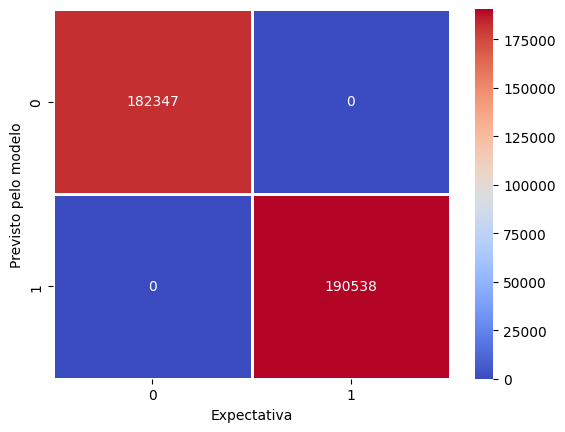

Acurácia: 100.000000%
Precisão: 100.000000%
Recall:  100.000000%
F1 Score:  100.000000%
MCC:  100.000000%

MÉTRICAS TESTE
 
SMOTE 5050



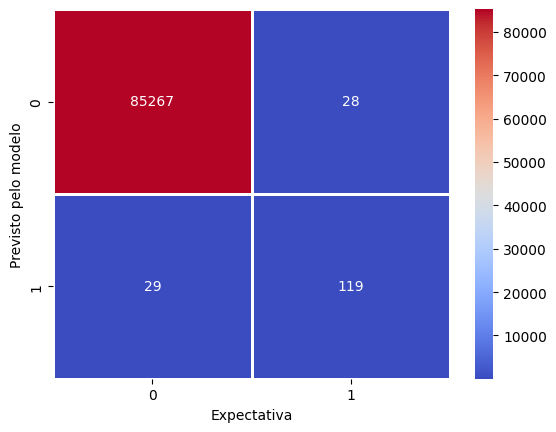

Acurácia: 99.933289%
Precisão: 80.952381%
Recall:  80.405405%
F1 Score:  80.677966%
MCC:  80.645018%

MÉTRICA AUC ROC

Treinamento:  1.0 
Teste: 0.9018628907939535


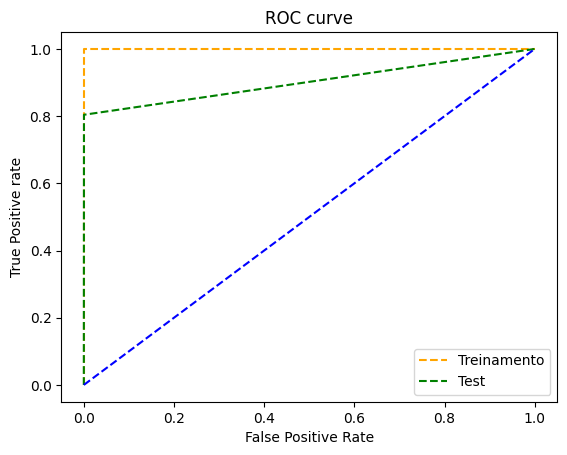

In [13]:
cf_matrix = confusion_matrix(y_train_sm_5050, y_pred_rl)
sn.heatmap(cf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Expectativa')
plt.ylabel('Previsto pelo modelo')
print("\nMÉTRICAS TREINAMENTO\n \nSMOTE 5050\n")
plt.show()
print(f'Acurácia: {accuracy_score(y_train_sm_5050, y_pred_rl):%}')
print(f'Precisão: {precision_score(y_train_sm_5050, y_pred_rl):%}')
print(f'Recall:  {recall_score(y_train_sm_5050, y_pred_rl):%}')
print(f'F1 Score:  {f1_score(y_train_sm_5050, y_pred_rl):%}')
print(f'MCC:  {matthews_corrcoef(y_train_sm_5050, y_pred_rl)}')
cf_matrix = confusion_matrix(y_test, resultado_rl)
sn.heatmap(cf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Expectativa')
plt.ylabel('Previsto pelo modelo')
print("\nMÉTRICAS TESTE\n \nSMOTE 5050\n")
plt.show()
print(f'Acurácia: {accuracy_score(y_test, resultado_rl):%}')
print(f'Precisão: {precision_score(y_test, resultado_rl):%}')
print(f'Recall:  {recall_score(y_test, resultado_rl):%}')
print(f'F1 Score:  {f1_score(y_test, resultado_rl):%}')
print(f'MCC:  {matthews_corrcoef(y_test, resultado_rl)}')


print("\nMÉTRICA AUC ROC\n")
fpr1, tpr1, thresh1 = roc_curve(y_train_sm_5050, y_pred_rl, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, resultado_rl, pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

auc_score1 = roc_auc_score(y_train_sm_5050, y_pred_rl)
auc_score2 = roc_auc_score(y_test, resultado_rl)

print("Treinamento: ",auc_score1, "\nTeste:", auc_score2)

plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Treinamento')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Test')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC')
plt.show();

#####**MODELO 2**

In [ ]:
model = cuRandomForestClassifier(max_iter=10000, solver='qn', verbose=True)
model.fit(X_train_sm_5050, y_train_sm_5050)
y_pred_curl = model.predict(X_train_sm_5050)

print(classification_report(y_train_sm_5050, y_pred_curl))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198698
           1       1.00      1.00      1.00    198698

    accuracy                           1.00    397396
   macro avg       1.00      1.00      1.00    397396
weighted avg       1.00      1.00      1.00    397396



In [ ]:
print(X_test)
resultado_curl = model.predict(X_test)

            Time        V1        V2        V3        V4        V5        V6  \
186882  127294.0 -2.537331  1.890864 -0.840555 -1.102759 -2.105725  0.367811   
165754  117632.0 -0.250839  1.104108  0.206089  0.417324  1.204079 -0.350694   
235285  148330.0  0.568980 -2.520416 -1.114138  1.670652 -1.128945  0.398822   
101271   67778.0  1.328892  0.226908 -0.308968  0.381772  0.238490 -0.282946   
5832      6308.0  1.124863 -0.165691  1.337053  1.030033 -0.891116  0.202926   
...          ...       ...       ...       ...       ...       ...       ...   
64725    51279.0 -1.808185  1.328808 -0.991449 -2.473986  2.185095  3.496806   
16688    28048.0 -0.442905  0.716727  1.256775  0.860048  1.210872  1.066390   
183868  125990.0  2.092418 -0.931315 -1.553089 -1.131369 -0.197801 -0.373117   
45011    42168.0  1.293234  0.097565 -0.209304  0.329036  0.034958 -0.145507   
150527   93609.0  2.214016 -0.584030 -1.238673 -0.702993 -0.184492 -0.646248   

              V7        V8        V9  .


MÉTRICAS TREINAMENTO
 
SMOTE 1090



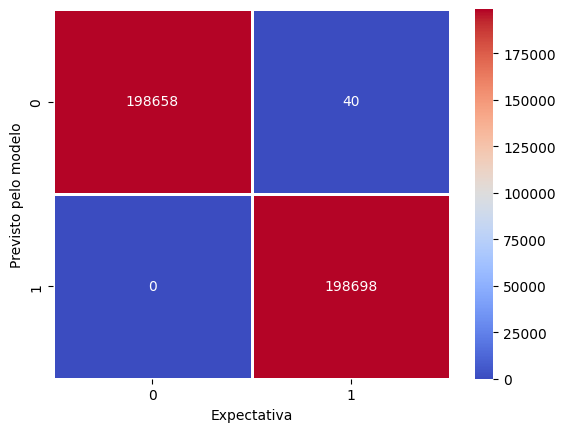

Acurácia: 99.989934%
Precisão: 99.979873%
Recall:  100.000000%
F1 Score:  99.989935%
MCC:  99.979871%

MÉTRICAS TESTE
 
SMOTE 5050



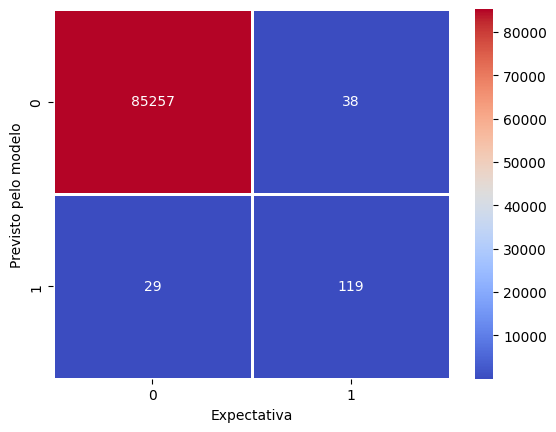

Acurácia: 99.921585%
Precisão: 75.796178%
Recall:  80.405405%
F1 Score:  78.032787%
MCC:  78.027643%

MÉTRICA AUC ROC

Treinamento:  0.9998993447342197 
Teste: 0.901804270710713


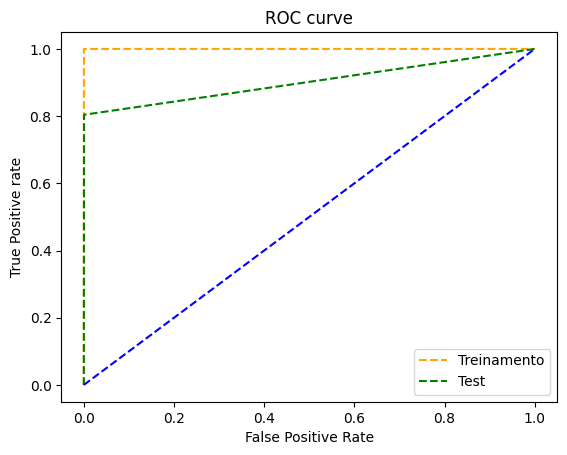

In [ ]:
cf_matrix = confusion_matrix(y_train_sm_5050, y_pred_curl)
sn.heatmap(cf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Expectativa')
plt.ylabel('Previsto pelo modelo')
print("\nMÉTRICAS TREINAMENTO\n \nSMOTE 1090\n")
plt.show()
print(f'Acurácia: {accuracy_score(y_train_sm_5050, y_pred_curl):%}')
print(f'Precisão: {precision_score(y_train_sm_5050, y_pred_curl):%}')
print(f'Recall:  {recall_score(y_train_sm_5050, y_pred_curl):%}')
print(f'F1 Score:  {f1_score(y_train_sm_5050, y_pred_curl):%}')
print(f'MCC:  {matthews_corrcoef(y_train_sm_5050, y_pred_curl)}')
cf_matrix = confusion_matrix(y_test, resultado_curl)
sn.heatmap(cf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Expectativa')
plt.ylabel('Previsto pelo modelo')
print("\nMÉTRICAS TESTE\n \nSMOTE 5050\n")
plt.show()
print(f'Acurácia: {accuracy_score(y_test, resultado_curl):%}')
print(f'Precisão: {precision_score(y_test, resultado_curl):%}')
print(f'Recall:  {recall_score(y_test, resultado_curl):%}')
print(f'F1 Score:  {f1_score(y_test, resultado_curl):%}')
print(f'MCC:  {matthews_corrcoef(y_test, resultado_curl)}')


print("\nMÉTRICA AUC ROC\n")
fpr1, tpr1, thresh1 = roc_curve(y_train_sm_5050, y_pred_curl, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, resultado_curl, pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

auc_score1 = roc_auc_score(y_train_sm_5050, y_pred_curl)
auc_score2 = roc_auc_score(y_test, resultado_curl)

print("Treinamento: ",auc_score1, "\nTeste:", auc_score2)

plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Treinamento')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Test')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC')
plt.show();